In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
data.info()
#All the independent variables are float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
(data['target'] == 1).sum()/data.shape[0]*100
#Only 10.049% of the values in target variable are positive

10.049

In [7]:
df = data.copy()

In [8]:
#ID_code identifies each row uniquely. It is not helping in predicting the target variables thus it can be dropped.
df.drop(['ID_code'], axis=1, inplace=True)

In [9]:
#check if there are missing values in any of the fields.
(df.isna().sum()/df.shape[0]).unique()

array([0.])

In [10]:
std_dev = pd.DataFrame(columns=['initial'], data= df.apply(lambda x: x.std()))

In [11]:
#Correcting the outliers
no_of_outliers = []
std_dev['final'] = np.nan
cols = df.columns
for i in np.arange(1,df.shape[1]):
    q75, q25 = np.percentile(df.iloc[:,i],[75,25])
    iqr = q75 - q25
    min = q25 - (1.5*iqr)
    max = q75 + (1.5*iqr)
    
    col = cols[i]
    no_of_outliers.append(df.loc[(df[col]<min) | (df[col]>max), col].shape)
    #maximum 1208 outlier found in a column
    df.loc[(df[col]<min) | (df[col]>max), col] = df[col].mean()    
    std_dev['final'][i] = df[col].std()

std_dev['diff'] = std_dev['initial']-std_dev['final']

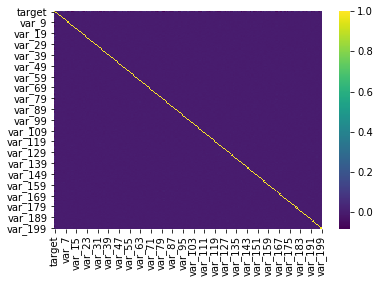

In [12]:
#checking correlation between the features
sns.heatmap(df.corr(), cmap='viridis')

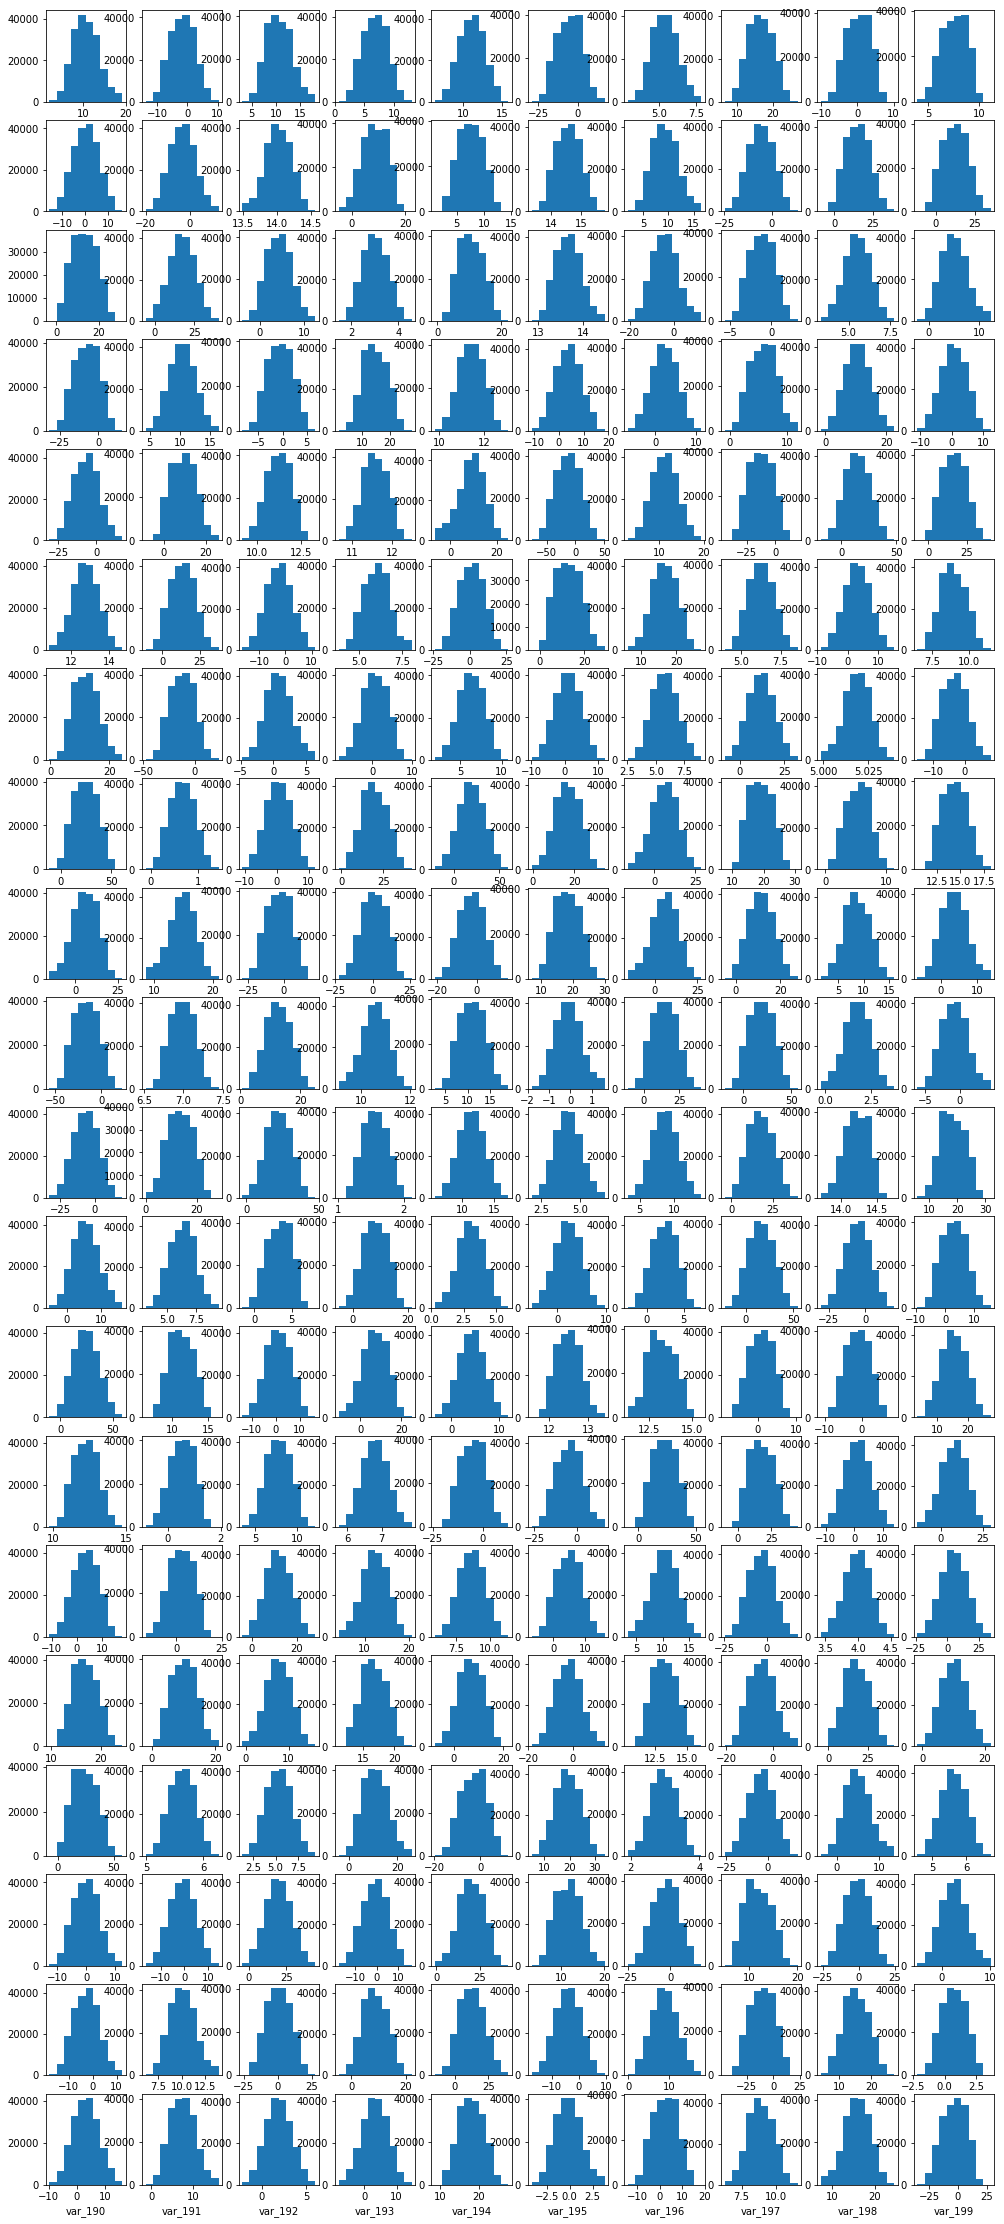

In [13]:
fig,axes = plt.subplots(nrows=10,ncols=10,figsize=(17,40))
plt.tight_layout

c=0
for i in df.iloc[:,1:].columns:
    c+=1
    plt.subplot(20,10,c)
    plt.hist(df[i])
    plt.xlabel(i)
     


In [14]:
#Divide the target and independent variables
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const       3.660313e-30
var_0       2.307184e-98
var_1       1.648779e-92
var_2      6.404815e-112
var_3       1.628697e-06
var_4       3.507740e-07
var_5       2.535200e-40
var_6      3.989868e-165
var_7       4.678611e-01
var_8       1.537183e-13
var_9       3.912334e-65
var_10      5.099345e-01
var_11      1.845740e-18
var_12     2.369613e-170
var_13     3.960095e-114
var_14      2.703545e-02
var_15      9.055805e-14
var_16      2.553792e-03
var_17      8.256008e-01
var_18      1.106991e-65
var_19      2.885950e-05
var_20      5.251640e-15
var_21     6.193790e-127
var_22     1.100683e-131
var_23      1.165485e-27
var_24      9.168759e-35
var_25      2.202290e-06
var_26     8.919969e-140
var_27      5.628945e-01
var_28      8.085581e-24
               ...      
var_170     9.988424e-84
var_171     1.162157e-09
var_172     2.042742e-56
var_173     1.805576e-68
var_174    7.405737e-138
var_175     1.231198e-18
var_176     3.386473e-04
var_177     5.462613e-53
var_178     1.604037e-14


In [34]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = p.max()
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_8', 'var_9', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_28', 'var_29', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_40', 'var_42', 'var_43', 'var_44', 'var_45', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_97', 'var_99', 'var_101', 'var_102', 'var_104', 'var_105', 'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112

In [35]:
#subset of data with selected features
X = df[selected_features_BE]

In [36]:
X.shape

(200000, 179)

In [37]:
#Sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [38]:
#Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
#Applying models

In [50]:
#Logistic Regression

log_model = LogisticRegression(solver='lbfgs')
log_model.fit(X_train, y_train)
pred = log_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc1 = auc(fpr, tpr)

print("AUC: ",auc1)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



AUC:  0.6273168740381907
[[58609   775]
 [ 4845  1771]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     59384
           1       0.70      0.27      0.39      6616

    accuracy                           0.91     66000
   macro avg       0.81      0.63      0.67     66000
weighted avg       0.90      0.91      0.90     66000



In [51]:
#Naive Bayes

NB = GaussianNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc1 = auc(fpr, tpr)

print("AUC: ",auc1)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


AUC:  0.6737080601470543
[[58473   911]
 [ 4216  2400]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     59384
           1       0.72      0.36      0.48      6616

    accuracy                           0.92     66000
   macro avg       0.83      0.67      0.72     66000
weighted avg       0.91      0.92      0.91     66000



In [52]:
#Decision Tree

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)
pred = decisionTree.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc1 = auc(fpr, tpr)

print("AUC: ",auc1)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

#0.5572936427261419

AUC:  0.5611249090012561
[[53907  5477]
 [ 5197  1419]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     59384
           1       0.21      0.21      0.21      6616

    accuracy                           0.84     66000
   macro avg       0.56      0.56      0.56     66000
weighted avg       0.84      0.84      0.84     66000



In [53]:
#Random Forest

randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
pred = randomForest.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc1 = auc(fpr, tpr)

print("AUC: ",auc1)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

C:\Users\simran.chhabra1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC:  0.507932864877474
[[59276   108]
 [ 6499   117]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     59384
           1       0.52      0.02      0.03      6616

    accuracy                           0.90     66000
   macro avg       0.71      0.51      0.49     66000
weighted avg       0.86      0.90      0.86     66000



In [44]:
test = pd.read_csv('test.csv')
ID_code = test['ID_code']
test.drop(['ID_code'], axis=1, inplace=True)

In [45]:
test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [46]:
(test.isna().sum()/test.shape[0]).unique()

array([0.])

In [47]:
test = test[selected_features_BE]

In [48]:
NB = GaussianNB()
NB.fit(X, y)
pred = NB.predict(test)

In [49]:
output = pd.DataFrame({'ID_code': ID_code, 'target': pred})

output.to_csv('submission.csv',index=False)